In [5]:
import json
import pandas as pd
import numpy as np

import preprocessor as p
import statistics as s
import gmplot

import plotly.plotly as py
import plotly.tools as tls

In [6]:
tweetslist = []
datafile='#280characters/#280characters_2017-11-07_to_2017-11-10.json'
with open(datafile,'r') as tweets:
    tweetslist =[tweet for tweet in tweets]

        
        
        
        

In [7]:
tweetslist[0:40]

['{"contributors": null, "truncated": false, "text": "RT @CarolKfanclub: No need for #280characters to describe this wonderful woman. A picture says it all... https://t.co/Hkonl5EXxA", "is_quote_status": false, "in_reply_to_status_id": null, "id": 928692404407894016, "favorite_count": 0, "entities": {"symbols": [], "user_mentions": [{"id": 525718207, "indices": [3, 17], "id_str": "525718207", "screen_name": "CarolKfanclub", "name": "CarolKirkwoodFanClub"}], "hashtags": [{"indices": [31, 45], "text": "280characters"}], "urls": [], "media": [{"source_user_id": 525718207, "source_status_id_str": "928204281341202433", "expanded_url": "https://twitter.com/CarolKfanclub/status/928204281341202433/photo/1", "display_url": "pic.twitter.com/Hkonl5EXxA", "url": "https://t.co/Hkonl5EXxA", "media_url_https": "https://pbs.twimg.com/media/DOGk3EyW4AAJFT4.jpg", "source_user_id_str": "525718207", "source_status_id": 928204281341202433, "id_str": "928204264299749376", "sizes": {"large": {"h": 973, "resi

In [8]:
d = pd.read_json(datafile,  lines=True, encoding = 'utf-8')

In [9]:

print (d.shape)

(13491, 30)


In [10]:
d.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,None,2017-11-09 18:34:58,"{u'symbols': [], u'user_mentions': [{u'indices...","{u'media': [{u'source_user_id': 525718207, u's...",0,False,None,928692404407894016,928692404407894016,...,NaN,NaN,NaN,4,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://www.twitter.com"" rel=""nofollow...",RT @CarolKfanclub: No need for #280characters ...,False,"{u'follow_request_sent': False, u'has_extended..."
1,NaN,None,2017-11-09 18:34:58,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,None,928692404269600773,928692404269600768,...,NaN,NaN,NaN,3,False,"{u'contributors': None, u'truncated': True, u'...","<a href=""http://twitter.com/#!/download/ipad"" ...","RT @nitrovisualz: Creation Alert, \n\nArt illu...",False,"{u'follow_request_sent': False, u'has_extended..."


In [11]:
d.columns

Index([u'contributors', u'coordinates', u'created_at', u'entities',
       u'extended_entities', u'favorite_count', u'favorited', u'geo', u'id',
       u'id_str', u'in_reply_to_screen_name', u'in_reply_to_status_id',
       u'in_reply_to_status_id_str', u'in_reply_to_user_id',
       u'in_reply_to_user_id_str', u'is_quote_status', u'lang', u'metadata',
       u'place', u'possibly_sensitive', u'quoted_status', u'quoted_status_id',
       u'quoted_status_id_str', u'retweet_count', u'retweeted',
       u'retweeted_status', u'source', u'text', u'truncated', u'user'],
      dtype='object')

In [12]:
d.isnull().sum()

contributors                 13491
coordinates                  13473
created_at                       0
entities                         0
extended_entities            12001
favorite_count                   0
favorited                        0
geo                          13473
id                               0
id_str                           0
in_reply_to_screen_name      13056
in_reply_to_status_id        13112
in_reply_to_status_id_str    13112
in_reply_to_user_id          13056
in_reply_to_user_id_str      13056
is_quote_status                  0
lang                             0
metadata                         0
place                        13237
possibly_sensitive           10990
quoted_status                13155
quoted_status_id             12953
quoted_status_id_str         12953
retweet_count                    0
retweeted                        0
retweeted_status              2908
source                           0
text                             0
truncated           

In [13]:
d.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,None,2017-11-09 18:34:58,"{u'symbols': [], u'user_mentions': [{u'indices...","{u'media': [{u'source_user_id': 525718207, u's...",0,False,None,928692404407894016,928692404407894016,...,NaN,NaN,NaN,4,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://www.twitter.com"" rel=""nofollow...",RT @CarolKfanclub: No need for #280characters ...,False,"{u'follow_request_sent': False, u'has_extended..."
1,NaN,None,2017-11-09 18:34:58,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,None,928692404269600773,928692404269600768,...,NaN,NaN,NaN,3,False,"{u'contributors': None, u'truncated': True, u'...","<a href=""http://twitter.com/#!/download/ipad"" ...","RT @nitrovisualz: Creation Alert, \n\nArt illu...",False,"{u'follow_request_sent': False, u'has_extended..."
2,NaN,None,2017-11-09 18:34:56,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,None,928692398783266816,928692398783266816,...,NaN,NaN,NaN,1537,False,"{u'contributors': None, u'truncated': True, u'...","<a href=""http://twitter.com/download/iphone"" r...","RT @IAmOxfordComma: I, for one, welcome the ad...",False,"{u'follow_request_sent': False, u'has_extended..."
3,NaN,None,2017-11-09 18:34:54,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,None,928692390088634368,928692390088634368,...,NaN,NaN,NaN,490,False,"{u'contributors': None, u'truncated': True, u'...","<a href=""http://twitter.com/download/android"" ...",RT @jojoh888: A fine collection of liberals sc...,False,"{u'follow_request_sent': False, u'has_extended..."
4,NaN,None,2017-11-09 18:34:53,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,None,928692383277027329,928692383277027328,...,NaN,NaN,NaN,32,False,"{u'contributors': None, u'truncated': True, u'...","<a href=""http://twitter.com/download/android"" ...",RT @SSAFA: We don't need #280characters to say...,False,"{u'follow_request_sent': False, u'has_extended..."


## Creating New Dataframe With Bounding Box Coordinates

In [14]:
thingstoretain = ['created_at', 'id_str', 'place', 'retweet_count', 'text', 'user']
d = d[thingstoretain]

In [15]:
d.head()

,created_at,id_str,place,retweet_count,text,user
0,2017-11-09 18:34:58,928692404407894016,None,4,RT @CarolKfanclub: No need for #280characters ...,"{u'follow_request_sent': False, u'has_extended..."
1,2017-11-09 18:34:58,928692404269600768,None,3,"RT @nitrovisualz: Creation Alert, \n\nArt illu...","{u'follow_request_sent': False, u'has_extended..."
2,2017-11-09 18:34:56,928692398783266816,None,1537,"RT @IAmOxfordComma: I, for one, welcome the ad...","{u'follow_request_sent': False, u'has_extended..."
3,2017-11-09 18:34:54,928692390088634368,None,490,RT @jojoh888: A fine collection of liberals sc...,"{u'follow_request_sent': False, u'has_extended..."
4,2017-11-09 18:34:53,928692383277027328,None,32,RT @SSAFA: We don't need #280characters to say...,"{u'follow_request_sent': False, u'has_extended..."


In [16]:
located = d[d['place'].notnull()]

located.reset_index(level=None, drop=True, inplace=True)

located

,created_at,id_str,place,retweet_count,text,user
0,2017-11-09 18:34:49,928692370123653120,"{u'country_code': u'US', u'url': u'https://api...",0,All images on this account are my property. Un...,"{u'follow_request_sent': False, u'has_extended..."
1,2017-11-09 18:34:18,928692237793484800,"{u'country_code': u'CY', u'url': u'https://api...",0,┏┓\n┃┃╱╲\n┃╱╱╲╲\n╱╱╭╮╲╲IN\n▔▏┗┛▕▔ THIS\n╱▔▔▔▔▔...,"{u'follow_request_sent': False, u'has_extended..."
2,2017-11-09 18:33:23,928692008486686720,"{u'country_code': u'BE', u'url': u'https://api...",0,"Toen ik deze ochtend vh werk naar huis reed, d...","{u'follow_request_sent': False, u'has_extended..."
3,2017-11-09 18:31:22,928691501273673728,"{u'country_code': u'BE', u'url': u'https://api...",0,Had lovely time in Belgium with friends &amp; ...,"{u'follow_request_sent': False, u'has_extended..."
4,2017-11-09 18:31:15,928691470529376256,"{u'country_code': u'IL', u'url': u'https://api...",0,Who says you can't be creative with #280charac...,"{u'follow_request_sent': False, u'has_extended..."
5,2017-11-09 18:30:52,928691374379229184,"{u'country_code': u'GB', u'url': u'https://api...",0,Waste of #280characters all to show that #safc...,"{u'follow_request_sent': False, u'has_extended..."
6,2017-11-09 18:29:53,928691126529167360,"{u'country_code': u'CA', u'url': u'https://api...",0,#280characters I love having 280 characters to...,"{u'follow_request_sent': False, u'has_extended..."
7,2017-11-09 18:29:48,928691105729671168,"{u'country_code': u'QA', u'url': u'https://api...",0,#280characters 🇶🇦🇶🇦🇶🇦💗💗💗,"{u'follow_request_sent': False, u'has_extended..."
8,2017-11-09 18:28:50,928690860702732288,"{u'country_code': u'GB', u'url': u'https://api...",0,Who Lives in a pineapple under the sea?\nSpong...,"{u'follow_request_sent': False, u'has_extended..."
9,2017-11-09 18:28:46,928690845938630656,"{u'country_code': u'US', u'url': u'https://api...",0,https://t.co/xfWodIgreg Shop @BlendersEyewear ...,"{u'follow_request_sent': False, u'has_extended..."


In [17]:
loc_coord = located.place[5].get('bounding_box').get('coordinates')

loc_coord

[[[-2.6896487528799, 54.4511368492598],
  [-0.7895899986575341, 54.4511368492598],
  [-0.7895899986575341, 55.8116995493485],
  [-2.6896487528799, 55.8116995493485]]]

In [18]:
loc_coord[0][3][1]

55.8116995493485

In [19]:
print (located.dtypes)
print (located.shape)

created_at       datetime64[ns]
id_str                    int64
place                    object
retweet_count             int64
text                     object
user                     object
dtype: object
(254, 6)


In [20]:
located.isnull().sum()

created_at       0
id_str           0
place            0
retweet_count    0
text             0
user             0
dtype: int64

In [21]:
for row in range(len(located)):
    loc_coord = located.place[row].get('bounding_box').get('coordinates')
    lat_1 = []
    long_1 = []

    centre_long = (loc_coord[0][0][0] + loc_coord[0][1][0] + loc_coord[0][2][0] + loc_coord[0][3][0])/4
    centre_lat = (loc_coord[0][0][1] + loc_coord[0][1][1] + loc_coord[0][2][1] + loc_coord[0][3][1])/4
    lat_1 = lat_1.append(centre_lat)
    long_1 = long_1.append(centre_long)

    
#print centre_lat

In [22]:
located.text[0]

u'All images on this account are my property. Unless stolen from some corporation that was stupid enough to put it on\u2026 https://t.co/aGnjEyKE7o'

In [23]:
located.user[0].get('screen_name')

u'James2020Vision'

In [24]:
located.user[0].get('location')

u'Connecticut, USA'

In [25]:
located.user[0].get('created_at')

u'Mon Jul 24 19:01:12 +0000 2017'

In [26]:
print (located)

             created_at              id_str  \
0   2017-11-09 18:34:49  928692370123653120   
1   2017-11-09 18:34:18  928692237793484800   
2   2017-11-09 18:33:23  928692008486686720   
3   2017-11-09 18:31:22  928691501273673728   
4   2017-11-09 18:31:15  928691470529376256   
5   2017-11-09 18:30:52  928691374379229184   
6   2017-11-09 18:29:53  928691126529167360   
7   2017-11-09 18:29:48  928691105729671168   
8   2017-11-09 18:28:50  928690860702732288   
9   2017-11-09 18:28:46  928690845938630656   
10  2017-11-09 18:26:22  928690241031905280   
11  2017-11-09 18:25:48  928690100879478784   
12  2017-11-09 18:24:29  928689768216629248   
13  2017-11-09 18:24:07  928689676172455936   
14  2017-11-09 18:24:02  928689653179469824   
15  2017-11-09 18:23:54  928689619117338624   
16  2017-11-09 18:23:17  928689464926334976   
17  2017-11-09 18:22:46  928689336127602688   
18  2017-11-09 18:22:38  928689302720188416   
19  2017-11-09 18:22:28  928689259548090368   
20  2017-11-0

In [27]:
located.place[2].get('bounding_box')

{u'coordinates': [[[5.2121062, 50.8677279],
   [5.4145591, 50.8677279],
   [5.4145591, 50.9815265],
   [5.2121062, 50.9815265]]],
 u'type': u'Polygon'}

In [28]:
name_add = []
time_add = []
text_add = []
loc_add = []
lat_add = []
long_add = []
fav_add = []
id_add = []
loc_coord = []
#Place the lists outside the loop 

#for n in range(located.shape[0]):
for n in np.arange(located.shape[0]):
    
    
    
    
    #coords first
    loc_coord = located.place[n].get('bounding_box').get('coordinates')
    centre_long1 = (loc_coord[0][0][0] + loc_coord[0][1][0] + loc_coord[0][2][0] + loc_coord[0][3][0])/4
    centre_lat1 = (loc_coord[0][0][1] + loc_coord[0][1][1] + loc_coord[0][2][1] + loc_coord[0][3][1])/4
    lat_add.append(centre_lat1)
    long_add.append(centre_long1)
    
    #name
    name_add.append(located.user[n].get('screen_name'))
    #time
    time_add.append(located.user[n].get('created_at'))
    
    #place
    loc_add.append(located.user[n].get('location'))
    
    #text
    text_add.append(located.text[n])
    
#tweet clean should only be made after the for loop.  

tweet_clean = pd.DataFrame({'name': name_add,'time': time_add, 'text': text_add, 'location': loc_add, 'lat': lat_add, 'long': long_add})

In [29]:
located.shape[0]

254

In [30]:
tweet_clean

,lat,location,long,name,text,time
0,41.500753,"Connecticut, USA",-72.757385,James2020Vision,All images on this account are my property. Un...,Mon Jul 24 19:01:12 +0000 2017
1,35.135671,Cyprus,33.437825,AndreasKoureas9,┏┓\n┃┃╱╲\n┃╱╱╲╲\n╱╱╭╮╲╲IN\n▔▏┗┛▕▔ THIS\n╱▔▔▔▔▔...,Fri Feb 22 19:47:05 +0000 2013
2,50.924627,België,5.313333,akbaspinar,"Toen ik deze ochtend vh werk naar huis reed, d...",Sat Feb 13 20:24:37 +0000 2010
3,51.214058,زنداباد افغانستان,2.922000,stanikzai_19,Had lovely time in Belgium with friends &amp; ...,Sat Jul 20 12:17:21 +0000 2013
4,31.342253,"Modi'in, Israel",34.968429,pauljacobson,Who says you can't be creative with #280charac...,Tue Jan 30 19:55:08 +0000 2007
5,55.131418,Secret Village,-1.739619,scottyf82,Waste of #280characters all to show that #safc...,Wed Oct 27 09:53:34 +0000 2010
6,50.564844,Lethbridge Alberta,-111.885418,benrowley78,#280characters I love having 280 characters to...,Sun Aug 08 03:38:23 +0000 2010
7,25.324668,Doha Qatar,51.539142,AlAbatQatar,#280characters 🇶🇦🇶🇦🇶🇦💗💗💗,Mon Jan 07 17:46:58 +0000 2013
8,51.457877,"South West, England",-2.585390,WetPoopster,Who Lives in a pineapple under the sea?\nSpong...,Fri Aug 04 23:36:44 +0000 2017
9,37.367869,"Bishop, CA",-118.418669,e_hynd395,https://t.co/xfWodIgreg Shop @BlendersEyewear ...,Fri Oct 13 21:52:14 +0000 2017


In [31]:
def clean(data):
    column_names = ['name','text','location','lat','long']
    coords = pd.DataFrame(columns = column_names)
    for rows in data:
        loc_coord1 = data.place[rows].get('bounding_box').get('coordinates')
        centre_long = (loc_coord[rows][0][0] + loc_coord[rows][1][0] + loc_coord[rows][2][0] + loc_coord[rows][3][0])/4
        centre_lat = (loc_coord[rows][0][1] + loc_coord[rows][1][1] + loc_coord[rows][2][1] + loc_coord[rows][3][1])/4
        text_add = data.text[rows]
        user_add = data.user[rows].get('screen_name')
        loc_add = data.user[rows].get('location')
        
        coords = coords.append(coords.DataFrame({'name': user_add, 'text': text_add, 'location': loc_add, 'lat': centre_lat, 'long': centre_long}, index=[rows]), ignore_index=True)
    
    return coords



In [32]:
print (d.shape)

(13491, 6)


In [33]:
import gmplot

gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

gmap.plot([37.4216548], [-122.0856374], 'cornflowerblue', edge_width=10)


gmap.draw("mymap.html")

In [34]:
located.describe()

,id_str,retweet_count
count,2.540000e+02,254.000000
mean,9.286667e+17,0.578740
std,1.487724e+13,5.126821
min,9.286414e+17,0.000000
25%,9.286530e+17,0.000000
50%,9.286677e+17,0.000000
75%,9.286790e+17,0.000000
max,9.286924e+17,81.000000


In [35]:
import requests

response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA')

resp_json_payload = response.json()

print(resp_json_payload['results'][0]['geometry']['location'])

{u'lat': 37.4216548, u'lng': -122.0856374}


In [36]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

/Users/Naren/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.

/Users/Naren/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/Naren/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



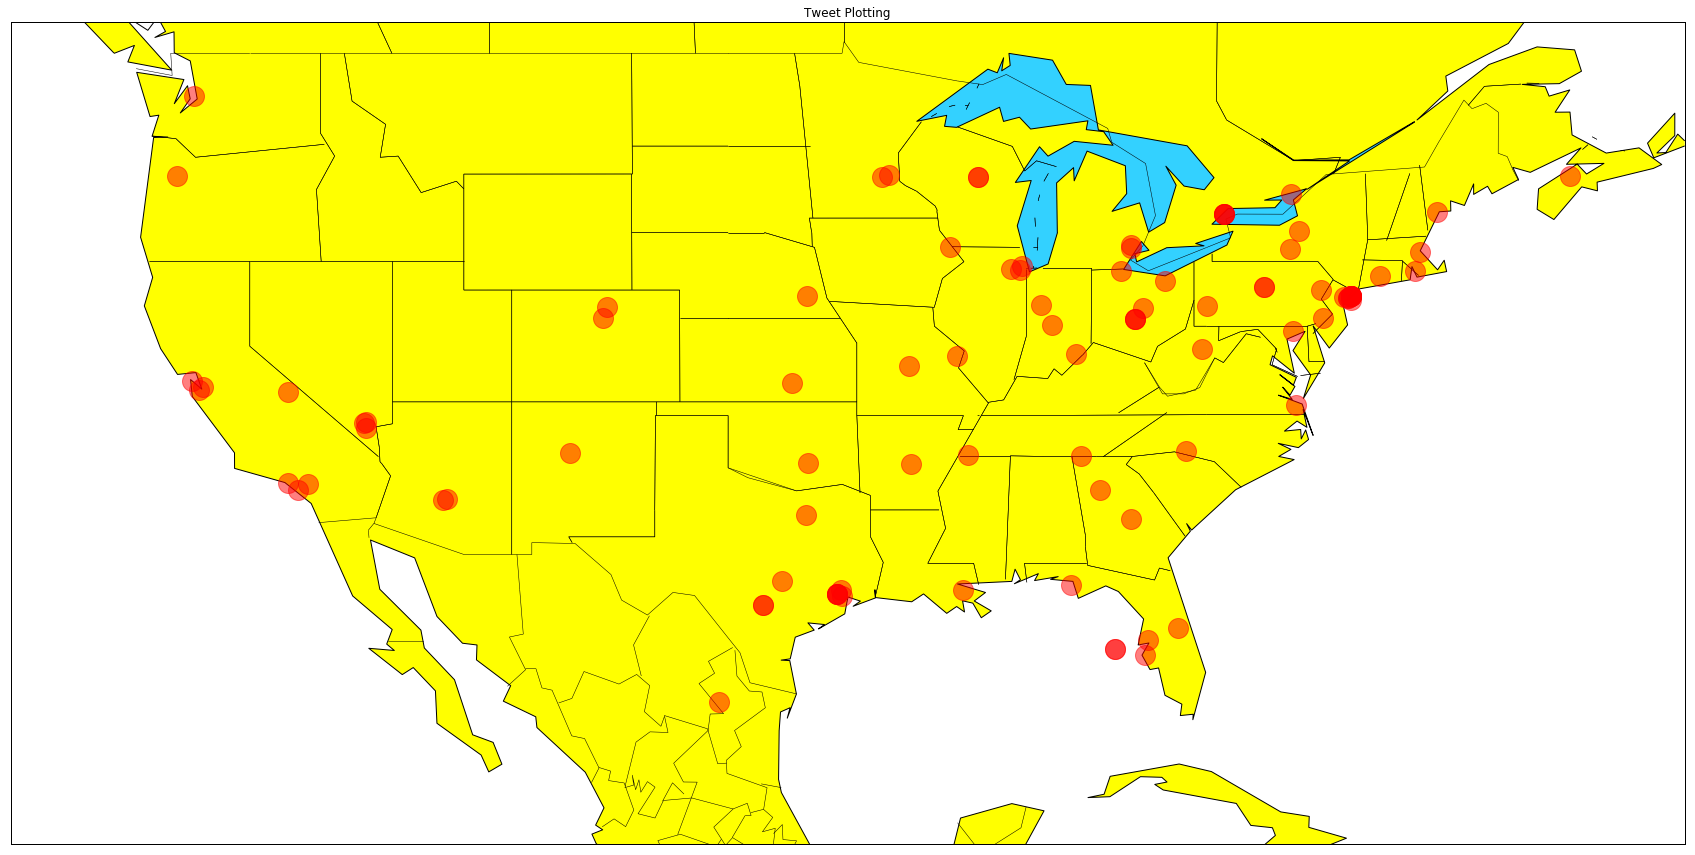

In [37]:
plt.figure(figsize=(30,30))
m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-130,urcrnrlon=-60,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='#FFFF00', lake_color='#33D1FF')
m.drawmapboundary(fill_color='#FFFFFF')

lat = lat_add
lon = long_add

x,y = m(lon,lat)
m.plot(x,y,'ro',markersize=20,alpha=.5)


plt.title('Tweet Plotting')
plt.show()


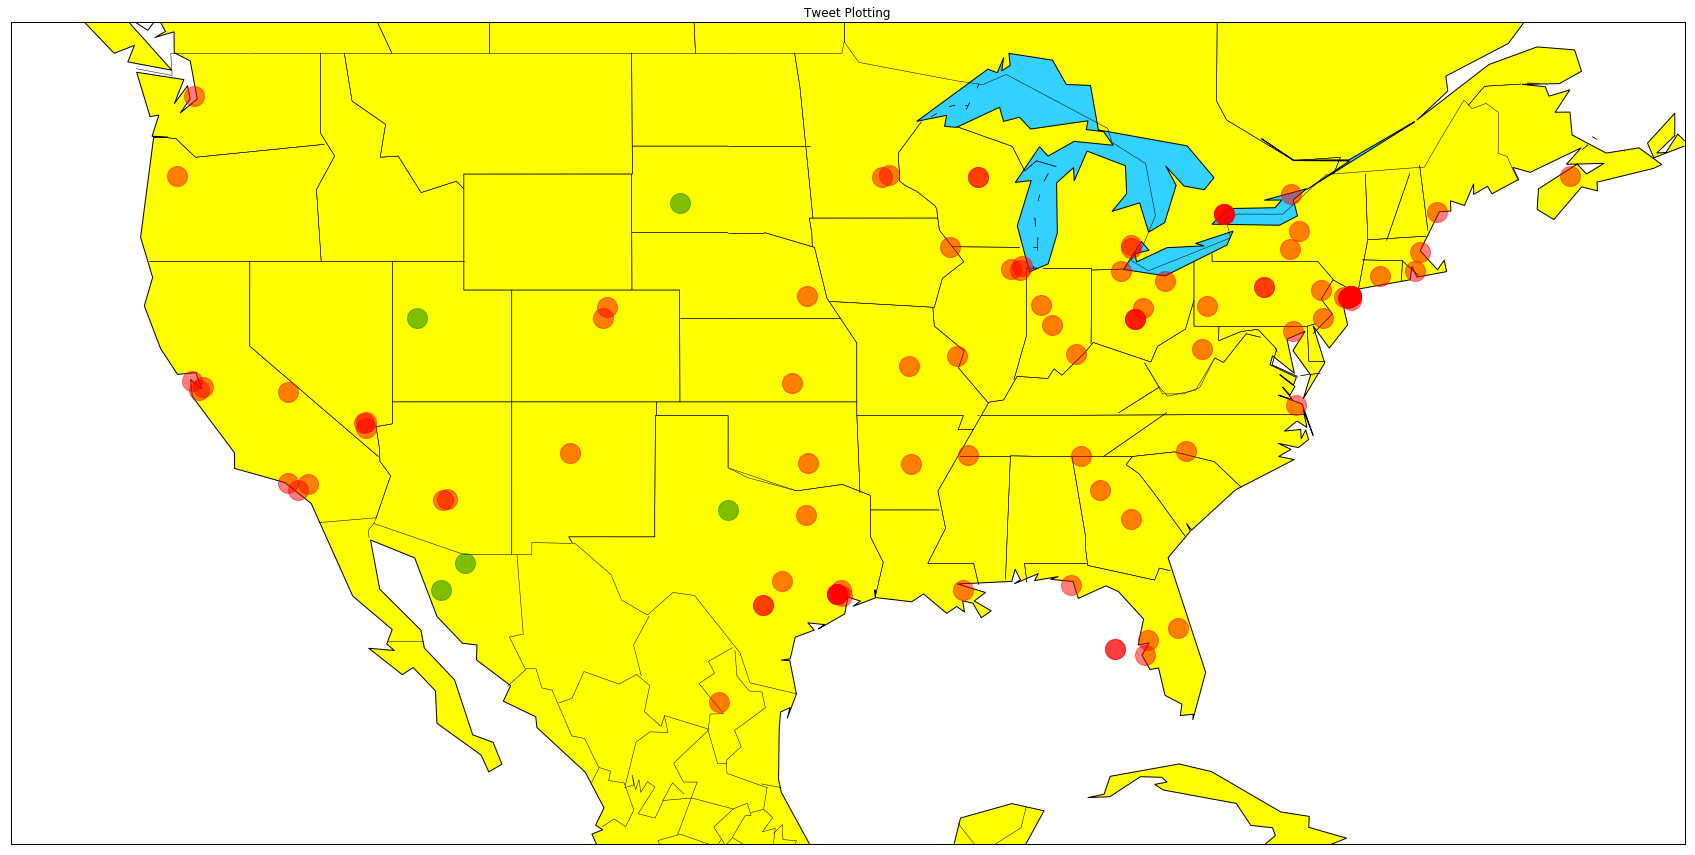

In [38]:
lat2 = 40,33,44,31,30
lon2 = -113,-100,-102,-111,-112

plt.figure(figsize=(30,30))
m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-130,urcrnrlon=-60,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='#FFFF00', lake_color='#33D1FF')
m.drawmapboundary(fill_color='#FFFFFF')

lat = lat_add
lon = long_add

x,y = m(lon,lat)
m.plot(x,y,'ro',markersize=20,alpha=.5)

x2,y2 = m(lon2,lat2)
m.plot( x2,y2,'go',markersize=20,alpha=.5)


plt.title('Tweet Plotting')
plt.show()

In [39]:
lat2 = [40,33,44,31,30]
lon2 = [-113,-100,-102,-111,-112]




In [40]:
import geopy.distance

dist = []
for n in np.arange(tweet_clean.shape[0]):

    coords_1 = (tweet_clean.lat[n], tweet_clean.long[n])
    coords_2 = (52.406374, 16.9251681)


    dist.append(geopy.distance.vincenty(coords_1, coords_2).km)
    
dist

[6484.867444114301,
 2322.359639013197,
 819.1912688939404,
 973.2653615098184,
 2760.813841999713,
 1263.357777785202,
 7622.812939613478,
 4177.439241182552,
 1342.004820052274,
 9161.763671720248,
 9653.207987325985,
 1171.5066564877936,
 6801.930656183141,
 9496.523005107118,
 7330.180335572406,
 9268.986350884563,
 11300.963011229138,
 6863.909926538009,
 1959.6016044025635,
 17547.851736867276,
 2139.3911374849527,
 1322.2498636007779,
 1185.1696918388566,
 812.5553890673167,
 9684.977523977184,
 1242.583495093436,
 9159.399014927638,
 8476.420281577024,
 4443.020260416369,
 1186.5836113503224,
 6613.453774886025,
 9275.431774351724,
 1237.9365135740406,
 1181.7263782801883,
 1289.6523204261841,
 1105.6734956101645,
 6039.241925764597,
 7061.435081090204,
 9285.178819642295,
 6669.951043545018,
 9684.977523977184,
 6995.3234317107,
 5541.153970423277,
 7477.252380678281,
 7099.175004587133,
 7312.289558412401,
 7384.955835154293,
 1244.5098453918276,
 8381.673000260307,
 5219.084

### Clustering Begins

In [42]:
from scipy.cluster import vq

In [81]:
#begin by zipping the individual lat and long coordinates that we have

coordinates_list = (zip(lat,lon))

coordinates_list = list(coordinates_list)

print len(coordinates_list)

254


In [86]:
# calculate the centroid coordinates of each cluster 
# and the variance of all the clusters
coord1 = coordinates_list[0:99]
coord2 = coordinates_list[100:199]
coord3 = coordinates_list[199:253]


coordinates_list_new = np.vstack([coord1, coord2, coord3])
centroids, variance  = vq.kmeans(coordinates_list_new, 20) #indicating i wish to see 20 clusters

In [87]:
centroids

array([[  43.89369044, -108.45020095],
       [  28.68985367,   43.47673938],
       [   1.02049522,  105.08487202],
       [  40.88881748,  -93.9578334 ],
       [  42.5798363 ,  -88.63594729],
       [  29.69226711,  -95.96912173],
       [  52.48332957,   -0.9805701 ],
       [ -13.54632338,   28.16084364],
       [  12.20917614,  122.19047715],
       [  24.37886109,  -81.64789049],
       [  38.56957902,  -83.92003768],
       [ -36.595729  ,  174.8562435 ],
       [  29.86787789,   71.81034501],
       [  41.72153406,  -78.01466256],
       [  44.66512412,   12.56925645],
       [  48.31384109,   -5.47719979],
       [  41.27505641,  -73.09064336],
       [  36.06903163, -120.75203012],
       [  17.96278104,   80.48139088]])

In [88]:
variance

5.1240126255105798

In [49]:
#we shall now seperate them into clusters 

In [90]:
clusterid, distance = vq.vq(coordinates_list_new, centroids)

In [91]:
clusterid

array([16,  1,  6,  6,  1,  6,  0,  1,  6, 17,  8,  6, 13, 17,  3, 17,  2,
       18, 15, 11, 14,  6,  6, 14,  2,  6,  2,  5,  1,  6, 16, 17,  6,  6,
        6, 14,  7, 13, 17, 16,  2, 13, 12, 10, 10,  4,  4,  6,  2,  7,  5,
       10, 17, 16,  0, 12, 16,  7, 18, 14, 18,  6, 17, 15, 18,  5,  6,  3,
        2,  6, 11, 10, 17,  6, 13, 13,  5,  7, 14, 10,  2, 16,  1, 14,  6,
        4,  6,  6,  6,  6,  5, 10, 10, 18,  3, 16, 17,  2, 16, 12, 13,  5,
       18, 13, 16, 17, 10,  6, 10, 15,  6,  6,  6,  4, 17,  6,  8, 12,  2,
        2,  6,  8,  2, 12,  7, 17,  7, 13,  4, 10, 15, 12, 16,  6, 10, 16,
       18,  6,  6, 17, 10,  6,  6,  2, 12,  6,  6, 13, 12, 10, 14, 16, 13,
        6,  1,  5, 10, 15,  6,  6,  9,  6,  0,  0,  6,  6,  8,  7,  9,  2,
       12,  5,  6,  5,  5, 12, 17, 14,  7, 13,  6, 18, 16,  9,  4,  3,  6,
       16,  5,  2, 12,  0,  5, 18,  2,  6,  5,  2,  9,  9,  6,  4,  6, 18,
       16, 12,  5, 18,  6, 18, 12, 16,  6,  9, 15,  1, 17, 12, 15,  6,  2,
       12, 15, 13, 13,  2

In [92]:
distance

array([  0.40249235,  11.93014511,   6.48403924,   4.10379116,
         8.91215889,   2.75472852,   7.50366662,   8.73652204,
         1.9044684 ,   2.67049602,   2.75729017,   1.33587532,
         0.72966598,   3.10989941,   4.14067068,   2.39399444,
        13.76692492,   2.79644143,  10.26247901,   0.        ,
        11.18367998,   2.54892282,   1.18525225,   3.68628434,
         1.27949828,   0.65353002,   5.815755  ,   5.79872968,
        12.6275588 ,   0.80457823,   1.00751402,   9.3996603 ,
         1.01474297,   1.16519316,   1.58673414,  18.97987552,
        14.9954386 ,   5.13698725,   9.22077908,   2.13953736,
         1.27949828,   2.35153935,   5.42585322,   4.55389655,
         3.10627076,   1.17217278,   2.7217501 ,   1.44253509,
        13.48531469,  32.02825407,  10.54996597,   2.18815794,
         9.15377216,   1.00751402,  10.68340847,   6.89591439,
         3.6572737 ,  15.04417003,   7.70299125,   3.63787732,
        10.08809849,   4.47006943,   5.53133343,   3.09

In [93]:
#create individual coordinate lists for each cluster

In [96]:
cluster_1 = coordinates_list_new[clusterid == 0]
cluster_2 = coordinates_list_new[clusterid == 1]
cluster_3 = coordinates_list_new[clusterid == 2]
cluster_4 = coordinates_list_new[clusterid == 3]
cluster_5 = coordinates_list_new[clusterid == 4] 

In [97]:
print(cluster_1[0:3])

[[  50.5648445  -111.885418  ]
 [  53.35324985 -113.4152742 ]
 [  40.0239815  -105.24268645]]


In [106]:
#time to plot the clusters and see visually how they turned out
%matplotlib inline
fig = plt.figure(figsize=(25,25))

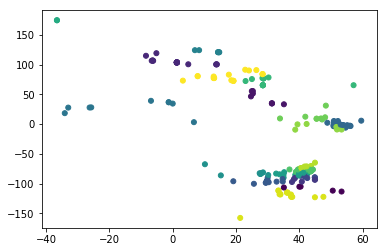

In [107]:
plt.scatter(coordinates_list_new[:,0], coordinates_list_new[:,1], s=25, c=clusterid)

In [108]:
variance

5.1240126255105798

AS we can see K-means is not the ideal algorithm for lattitude-longitude as it focuses on reducing variance rather than distance which is what i wanted for this project

## DBSCAN TIME

In the disaster relief and recovery programs, it is common to have trucks/airplanes dropping supplies. As such, they can only cover a certain number of points. It is easier to calculate logistics reasons the number of supplies, a cluster would require if we set minimum/maximum for them. 

In [122]:
from shapely.geometry import MultiPoint
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
import matplotlib.pyplot as plt, time

In [123]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088

In [135]:
# represent points consistently as (lat, lon)
coords = pd.DataFrame(columns=['lat', 'lon'])

coords['lat'] = lat
coords['lon'] = lon

# define epsilon as 1.5 kilometers, converted to radians for use by haversine
epsilon = 1.5 / kms_per_radian

## Compute DBSCAN
eps is the physical distance from each point that forms its neighborhood
min_samples is the min cluster size, otherwise it's noise - set to 1 so we get no noise

In [140]:
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(coords), num_clusters, 100*(1 - float(num_clusters) / len(coords)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Clustered 254 points down to 197 clusters, for 22.4% compression in 0.01 seconds
Silhouette coefficient: 0.331


In [141]:
# turn the clusters in to a pandas series, where each element is a cluster of points
clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])

# Find centroid points in DBScan rather than a representative point

In [142]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

centermost_points = clusters.map(get_centermost_point)

#shapely takes the x as lat, y as ln

KeyError: 0